In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import pandas as pd
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [36]:
#Summary Statistics:
#Read data and segregate according to treatment/control group
data = pd.read_csv("progresa-sample.csv.bz2")

#Print the number of null values in each column
missing_values = pd.isnull(data).sum(axis=0)

#Removing variables not needed for missing values
idx1 = pd.Index(['year','folnum','village','poor','progresa'])
index = missing_values.index.difference(idx1)
missing_values = missing_values[index]

In [37]:
#Calculate summary statistics of the data
summary = data.describe()
idx2 = pd.Index(['year','folnum','village'])

#Remove variables not needed in summary statistics
columns = summary.columns.difference(idx2)
summary = summary[columns].T

In [38]:
#Extract mean and standard deviation
mean = summary['mean']
std = summary['std']


In [39]:
#Print the summary statistics
summary_mean_std = pd.concat([mean,std,missing_values],axis=1)

summary_mean_std

,mean,std,0
age,11.366460,3.167744,0
dist_cap,147.674452,76.063134,0
dist_sec,2.418910,2.234109,0
fam_n,7.215715,2.352900,0
grc,3.963537,2.499063,6549
grc97,3.705372,2.572387,0
hohage,44.436717,11.620372,10
hohedu,2.768104,2.656106,0
hohsex,0.925185,0.263095,20
hohwag,586.985312,788.133664,0


In [41]:
data.progresa.unique()

array(['0', 'basal'], dtype=object)

In [120]:
print("Yes, the observations related to 'progresa' levels match the documentation provided, as we have  a '0' (control) and  a 'basal' (treatment) level which conform with the documentation provided. This is true for 'poor' levels as well, as we have 'pobre' (poor) and 'no pobre' (not poor) as mentioned in the documentation.)")

Yes, the observations related to 'progresa' levels match the documentation provided, as we have  a '0' (control) and  a 'basal' (treatment) level which conform with the documentation provided. This is true for 'poor' levels as well, as we have 'pobre' (poor) and 'no pobre' (not poor) as mentioned in the documentation.)


In [66]:
#Differences at baseline :
baseline = data.loc[(data.year == 97) & (data.poor == 'pobre'),]
#Dropping the non- demographic variables
baseline = baseline.drop ('village',axis = 1)
baseline = baseline.drop ('folnum',axis = 1)
bl_treat = baseline.loc[baseline.progresa == "basal"].dropna()
bl_control = baseline.loc[baseline.progresa == "0"].dropna()

#print(bl_control.dtypes)
#Drop string containing columns
bl_treat.drop(['year','poor','progresa'], axis=1, inplace=True)
bl_control.drop(['year','poor','progresa'], axis=1, inplace=True)

mtreat = bl_treat.mean()
mcontrol = bl_control.mean()
diff = bl_treat.mean() - bl_control.mean()
output = pd.concat([mtreat, mcontrol, diff], axis=1).reset_index()
output.rename(columns={'index': 'Variable name', 0: 'Average value (Treatment villages)', 
                       1: 'Average value (Control villages)', 2: "Difference(Treat - Control)"}, inplace=True)
diff_p = []
for column in bl_control:
    __, p_value = ttest_ind(bl_treat[column], bl_control[column])
    diff_p.append({'p-value': p_value})
diff_p = pd.DataFrame(diff_p)
final_output = pd.concat([output, diff_p], axis=1)
pd.concat([output, diff_p], axis=1)



,Variable name,Average value (Treatment villages),Average value (Control villages),Difference(Treat - Control),p-value
0,sex,0.520268,0.506556,0.013713,1.956962e-02
1,indig,0.316744,0.325306,-0.008562,1.183760e-01
2,dist_sec,2.399648,2.400687,-0.001039,9.670949e-01
3,sc,0.822697,0.815066,0.007631,9.117959e-02
4,grc,3.709214,3.733653,-0.024439,3.947750e-01
5,fam_n,7.281032,7.302939,-0.021907,4.236088e-01
6,min_dist,107.395231,103.098348,4.296884,1.936661e-18
7,dist_cap,151.801472,154.492095,-2.690622,3.414194e-03
8,hohedu,2.726729,2.660982,0.065747,2.613239e-02
9,hohwag,550.207086,580.694452,-30.487366,2.727661e-04


In [121]:
print("We choose to consider a factor as significantly different if the p-value from the t-test was less than 0.05. Based on this metric, statistically significant differences between the treatment and control villages are present in the following demographic variables: 1.sex 2.dist_sec 3.min_dist 4.dist_cap 5.hoh_edu 6.hoh_wag 7.welfare_index 8.hoh_age")

We choose to consider a factor as significantly different if the p-value from the t-test was less than 0.05. Based on this metric, statistically significant differences between the treatment and control villages are present in the following demographic variables: 1.sex 2.dist_sec 3.min_dist 4.dist_cap 5.hoh_edu 6.hoh_wag 7.welfare_index 8.hoh_age


In [122]:
print("It matters that there are differences at the baseline because they are relevant to the outcomes we observe after the Progresa scheme was implemented. The distribution of treatment and control villages is done to create equal values for the demographics of both groups, so that any latent effects are common to both of them. If we had not observed the significance of differences prior to the Progresa scheme launch, we would incorrectly  attribute the effect of these demographic variables to the Progresa scheme. This would create a biased and incorrect picture of reality.")

It matters that there are differences at the baseline because they are relevant to the outcomes we observe after the Progresa scheme was implemented. The distribution of treatment and control villages is done to create equal values for the demographics of both groups, so that any latent effects are common to both of them. If we had not observed the significance of differences prior to the Progresa scheme launch, we would incorrectly  attribute the effect of these demographic variables to the Progresa scheme. This would create a biased and incorrect picture of reality.


In [123]:
print("Because this experiment has not been able to randomize the treatment and control groups entirely, we need to be careful in measuring the impact of the treatment, and have to parse out the effect of treatment from the effect of these demographic variables. It's not impossible, but we will have to be mindful during our impact analysis to include these variables.")

Because this experiment has not been able to randomize the treatment and control groups entirely, we need to be careful in measuring the impact of the treatment, and have to parse out the effect of treatment from the effect of these demographic variables. It's not impossible, but we will have to be mindful during our impact analysis to include these variables.


In [74]:
#Measuring Impact
#Before- After Estimator :
poor_t_df = df[(df['poor'] == 'pobre') & (df['progresa'] == 'basal')]
poor_t_df =poor_t_df.ix[:,['village', 'year','sc']]

t_97_df = poor_t_df[poor_t_df['year'] == 97]
t_98_df = poor_t_df[poor_t_df['year'] == 98]

#For mean sc to give enroll percentage from 0-100, instead of 0-1
t_97_df.loc[:,'sc'] *= 100   #.loc to prevent SettingWithCopyWarning 
t_98_df.loc[:,'sc'] *= 100   

#Mean for each poor village
mean_97_df = t_97_df.groupby('village' , as_index = False).mean()
mean_98_df = t_98_df.groupby('village' , as_index = False).mean()



/Users/iguest/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
/Users/iguest/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/Users/iguest/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

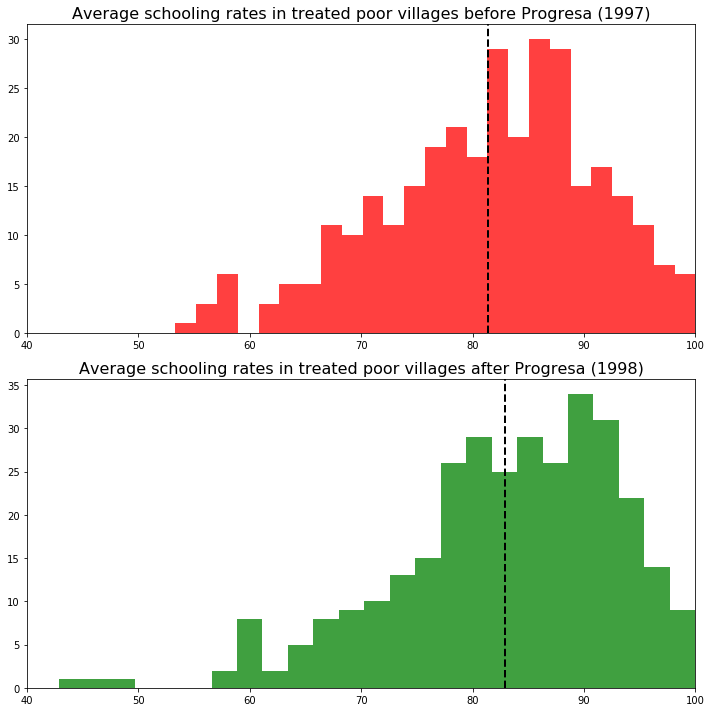

In [76]:
#Plot
#On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households).
%matplotlib inline

#Prepare the data
x1 = mean_97_df['sc'].values
x2 = mean_98_df['sc'].values

#Initialize the plot
fig, (ax0, ax1) = plt.subplots(nrows=2, figsize = (10,10))

ax0.set_title('Average schooling rates in treated poor villages before Progresa (1997)', fontsize=16)
ax1.set_title('Average schooling rates in treated poor villages after Progresa (1998)', fontsize=16)

ax0.set_xlim([40, 100])
ax1.set_xlim([40, 100])

#Plot the data
ax0.hist(x1, bins=25,histtype='stepfilled', facecolor='r', alpha=0.75)
ax0.axvline(x1.mean(), color='k', linestyle='dashed', linewidth=2)

ax1.hist(x2, bins=25, histtype='stepfilled', facecolor='g', alpha=0.75)
ax1.axvline(x2.mean(), color='k', linestyle='dashed', linewidth=2)

fig.tight_layout()
plt.show()

In [104]:
pre_treat_df =   df[(df['year'] == 97) & (df['poor'] == 'pobre') & (df['progresa'] == 'basal')]
pre_ctrl_df =   df[(df['year'] == 97) & (df['poor'] == 'pobre') & (df['progresa'] == '0')]

# Calculating means
treat_mean_1 = pre_treat_df['sc'].mean()
control_mean_1= pre_ctrl_df['sc'].mean()

# Running T-Test
tt_97 = stats.ttest_ind(pre_treat_df['sc'],pre_ctrl_df['sc'], nan_policy='omit')

# Adding to data frame
pd.DataFrame.from_items([('Control Mean', [control_mean_1]), 
                         ('Treatment Mean', [treat_mean_1]), 
                         ('Difference', [treat_mean_1 - control_mean_1]),
                         ('T Value', [tt_97[0]]), ('P Value', [tt_97[1]])])

/Users/iguest/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  from ipykernel import kernelapp as app


,Control Mean,Treatment Mean,Difference,T Value,P Value
0,0.815186,0.822697,0.007511,1.668745,0.095178


In [102]:
post_treat_df =   df[(df['year'] == 98) & (df['poor'] == 'pobre') & (df['progresa'] == 'basal')]
post_ctrl_df =   df[(df['year'] == 98) & (df['poor'] == 'pobre') & (df['progresa'] == '0')]

# Calculating means
treat_mean = post_treat_df['sc'].mean()
control_mean = post_ctrl_df['sc'].mean()

# Running T-Test
tt_98 = stats.ttest_ind(post_treat_df['sc'],post_ctrl_df['sc'], nan_policy='omit')

# Adding to data frame
pd.DataFrame.from_items([('Control Mean', [control_mean]), 
                         ('Treatment Mean', [treat_mean]), 
                         ('Difference', [treat_mean - control_mean]),
                         ('T Value', [tt_98[0]]), ('P Value', [tt_98[1]])])

/Users/iguest/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  from ipykernel import kernelapp as app


,Control Mean,Treatment Mean,Difference,T Value,P Value
0,0.807637,0.846479,0.038842,8.358721,6.636344e-17


In [105]:
# Considering only the poor from 1997
df_97 = df[(df['year'] == 97) & (df['poor'] == 'pobre')]

#No need to create dummy variable for categorical variable (Progresa) since only 2 values
# Fitting linear model
simple_model = smf.ols(formula = 'sc ~ progresa', data = df_97)
simple_res=simple_model.fit()

# Print
print("\nSimple regression : POOR Families in 1997 - Treatment/Control")
print(simple_res.summary())


Simple regression : POOR Families in 1997 - Treatment/Control
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.785
Date:                Wed, 05 Feb 2020   Prob (F-statistic):             0.0952
Time:                        06:54:07   Log-Likelihood:                -14305.
No. Observations:               30922   AIC:                         2.861e+04
Df Residuals:                   30920   BIC:                         2.863e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [103]:
# Considering only the poor from 1998
df_98 = df[(df['year'] == 98) & (df['poor'] == 'pobre')]

#No need to create dummy variable for categorical variable (Progresa) since only 2 values
# Fitting linear model
simple_model = smf.ols(formula = 'sc ~ progresa', data = df_98)
simple_res=simple_model.fit()

# Print
print("\nSimple regression : POOR Families in 1998 - Treatment/Control")
print(simple_res.summary())


Simple regression : POOR Families in 1998 - Treatment/Control
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           6.64e-17
Time:                        06:51:20   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

In [106]:
#Use the same df_97 (poor households in 1997)
# Fitting linear model
multi_model = smf.ols(formula = 'sc ~ progresa + age + dist_sec + sex + hohedu + indig', data = df_97)
multi_res=multi_model.fit()

# Print
print("\nMultiple regression : POOR Families in 1997 - Treatment/Control and Age, Gender, Indigeneous etc")
print(multi_res.summary())


Multiple regression : POOR Families in 1997 - Treatment/Control and Age, Gender, Indigeneous etc
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     2077.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        06:54:51   Log-Likelihood:                -9038.0
No. Observations:               30825   AIC:                         1.809e+04
Df Residuals:                   30818   BIC:                         1.815e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [107]:
#Use the same df_98 (poor households in 1998)
# Fitting linear model
multi_model = smf.ols(formula = 'sc ~ progresa + age + dist_sec + sex + hohedu + indig', data = df_98)
multi_res=multi_model.fit()

# Print
print("\nMultiple regression : POOR Families in 1998 - Treatment/Control and Age, Gender, Indigeneous etc")
print(multi_res.summary())


Multiple regression : POOR Families in 1998 - Treatment/Control and Age, Gender, Indigeneous etc
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     1666.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        06:54:55   Log-Likelihood:                -7671.8
No. Observations:               27340   AIC:                         1.536e+04
Df Residuals:                   27333   BIC:                         1.542e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

In [108]:
print('\nSimple Model - Standard Errors\n', simple_res.bse)
print('\nModel with Controls - Standard Errors\n', multi_res.bse)


Simple Model - Standard Errors
 Intercept            0.003542
progresa[T.basal]    0.004501
dtype: float64

Model with Controls - Standard Errors
 Intercept            0.009417
progresa[T.basal]    0.003993
age                  0.000685
dist_sec             0.000872
sex                  0.003878
hohedu               0.000777
indig                0.004144
dtype: float64


In [117]:
print("Yes, there is a statistically significant difference between the enrollment rates in the poor housholds in treated villages before and after Progresa. This difference was validated using a T-test whose results are at < 0.05 level of significance. The mean enrollment rate in the poor households of treated villages rose from 81.38 to 82.95 from 1997 to 1998. While this increase is statistically significant, it is yet to be confirmed that the difference is due to Progresa. The estimate of the treatment effect is now 0.0356 after adding the control variables, down from 0.0388 in the previous model. This suggests that the previous simple linear regression model was overestimating the effects of the treatment variable, whereas in this model, we have seen the true impact of Progresa treatment, while controlling for factors such as age,gender and education of head of household. Because these underlying factors have a statistically significant impact, we can see that the effect of the treatment alone has reduced.")

Yes, there is a statistically significant difference between the enrollment rates in the poor housholds in treated villages before and after Progresa. This difference was validated using a T-test whose results are at < 0.05 level of significance. The mean enrollment rate in the poor households of treated villages rose from 81.38 to 82.95 from 1997 to 1998. While this increase is statistically significant, it is yet to be confirmed that the difference is due to Progresa. The estimate of the treatment effect is now 0.0356 after adding the control variables, down from 0.0388 in the previous model. This suggests that the previous simple linear regression model was overestimating the effects of the treatment variable, whereas in this model, we have seen the true impact of Progresa treatment, while controlling for factors such as age,gender and education of head of household. Because these underlying factors have a statistically significant impact, we can see that the effect of the treatment

In [112]:
#Cross Sectional Estimator
# Subset the data to retain only observations corresponding to year 1998 and 'poor'
data_progresa_98 = data[np.logical_and(data['year'] == 98, 
                                                data['poor'] == 'pobre')]


# Print the output of the t-test
cross_sec_ttest = stats.ttest_ind(data_progresa_98[data_progresa_98['progresa'] == '0']['sc'].dropna(), 
                                  data_progresa_98[data_progresa_98['progresa'] == 'basal']['sc'].dropna())
print("Test Statistic (Cross-Sectional Estimator):", round(cross_sec_ttest.statistic, 6))
print("p-value (Cross-Sectional Estimator):", round(cross_sec_ttest.pvalue, 18))

Test Statistic (Cross-Sectional Estimator): -8.358721
p-value (Cross-Sectional Estimator): 6.6e-17


In [113]:
print("Yes, we observe that the calculated p-value is below 0.05, which suggests that the difference between the enrollment rate in control villages is statistically significantly different than the enrollment rate in treatment villages among poor households in the year 1998 (after treatment).")

Yes, we observe that the calculated p-value is below 0.05, which suggests that the difference between the enrollment rate in control villages is statistically significantly different than the enrollment rate in treatment villages among poor households in the year 1998 (after treatment).


In [124]:
# Import the 'statsmodels.formula.api' module
import statsmodels.formula.api as smf

# Create the regression model for 1998 enrollment rates of the poor on treatment assignment
model_regression = smf.ols(formula = 'sc ~ C(progresa)', data = data_progresa_98)
model_regression.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           6.64e-17
Time:                        07:50:55   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8076      0.004    220.676      0.000       0.800       0.815
C(progresa)[T.basal]     0.0388      0.005      8.359      0.000       0.030       0.048
==============================================================================
Omnibus:                     7638.939   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15767.534
Skew:                          -1.767   Prob(JB):                         0.00
Kurtosis:                       4.140   Cond. No.                         3.01
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
print("Based on the above results, progresa(treatment) increases the likelihood of a child enrolling by 0.0383. The t-test estimate was 8.1 whereas the same in the regression, coefficient is 0.0383.Here, the p-value is less than 0.05. Based on that, we can reject the null hypothesis stating that there is no effect of the treatment.")

Based on the above results, progresa(treatment) increases the likelihood of a child enrolling by 0.0383. The t-test estimate was 8.1 whereas the same in the regression, coefficient is 0.0383.Here, the p-value is less than 0.05. Based on that, we can reject the null hypothesis stating that there is no effect of the treatment.


In [125]:
# Create the multiple regression model for 1998 enrollment rates of the poor on treatment assignment
model_regression_multiple = smf.ols(formula = 'sc ~ C(progresa) + age + dist_sec + C(sex) + hohedu + welfare_index + C(indig)', 
                                    data = data_progresa_98)
model_regression_multiple.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     sc   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     1419.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        08:57:42   Log-Likelihood:                -7639.4
No. Observations:               27267   AIC:                         1.529e+04
Df Residuals:                   27259   BIC:                         1.536e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.5025      0.014    105.342      0.000       1.475       1.530
C(progresa)[T.basal]     0.0352      0.004      8.799      0.000       0.027       0.043
C(sex)[T.1.0]            0.0310      0.004      7.977      0.000       0.023       0.039
C(indig)[T.1.0]          0.0468      0.004     11.283      0.000       0.039       0.055
age                     -0.0655      0.001    -95.105      0.000      -0.067      -0.064
dist_sec                -0.0117      0.001    -13.361      0.000      -0.013      -0.010
hohedu                   0.0085      0.001     10.951      0.000       0.007       0.010
welfare_index         3.227e-05   1.72e-05      1.872      0.061   -1.52e-06    6.61e-05
==============================================================================
Omnibus:                     2993.090   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4083.947
Skew:                          -0.940   Prob(JB):                         0.00
Kurtosis:                       3.248   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [127]:
print("A: The controls reduces the point estimate of treatment effect from 0.0388 to 0.0352. B: The controls reduces the standard error on the treatment effect from 0.005 to 0.004. C: We observe that the treatment effect for 2.3 (0.0352) is different than what we observed in 2.2 (0.0388). This suggests that if we include a set of relevant control variables, we observe that the treatment effect diminishes by 9.28% (0.0036). This change in the value of treatment effect (0.0036) on the enrollment rates of the poor in the year 1998, is explained by the effect of the control variables in the regression. Also, we observe that the coefficient for treatment effect in 2.3 is statistically more significant than what we observed for 2.2.")

A: The controls reduces the point estimate of treatment effect from 0.0388 to 0.0352. B: The controls reduces the standard error on the treatment effect from 0.005 to 0.004. C: We observe that the treatment effect for 2.3 (0.0352) is different than what we observed in 2.2 (0.0388). This suggests that if we include a set of relevant control variables, we observe that the treatment effect diminishes by 9.28% (0.0036). This change in the value of treatment effect (0.0036) on the enrollment rates of the poor in the year 1998, is explained by the effect of the control variables in the regression. Also, we observe that the coefficient for treatment effect in 2.3 is statistically more significant than what we observed for 2.2.


In [132]:
#Difference in Difference Estimator using the a 4 way simple table :
#Using 1997 and 1998, looking at difference across treatment and control for POOR families
# Computing the means required for difference in difference
PreControlMean =    df[(df['poor'] == 'pobre') & (df['year'] == 97) & (df['progresa'] == '0')].mean()['sc']
PostControlMean =    df[(df['poor'] == 'pobre') & (df['year'] == 98) & (df['progresa'] == '0')].mean()['sc']

PreTreatMean =    df[(df['poor'] == 'pobre') & (df['year'] == 97) & (df['progresa'] == 'basal')].mean()['sc']
PostTreatMean =    df[(df['poor'] == 'pobre') & (df['year'] == 98) & (df['progresa'] == 'basal')].mean()['sc']

ControlDiff =   PostControlMean - PreControlMean
TreatmentDiff = PostTreatMean - PreTreatMean
DiffInDiff =    TreatmentDiff - ControlDiff

# Arranging means in a table using Series
diff_table = {'Before Progresa (97)':pd.Series([PreControlMean, PreTreatMean, ControlDiff], index = ['Control', 'Treatment', 'Difference']),
       'After Progresa (98)':pd.Series([PostControlMean, PostTreatMean, TreatmentDiff], index = ['Control', 'Treatment', 'Difference']),}

print("\ POOR Families in 1998 - Treatment/Control and demographic factors")
print (pd.DataFrame(diff_table))
print('\nThe difference in difference is :', DiffInDiff)

\ POOR Families in 1998 - Treatment/Control and demographic factors
            Before Progresa (97)  After Progresa (98)
Control                 0.815186             0.807637
Treatment               0.822697             0.846479
Difference             -0.007549             0.023782

The difference in difference is : 0.031331280319323085


In [130]:
#Regression :
# Considering only the poor
poor_df = df[(df['poor'] == 'pobre')]

#Create dummy variable for time as 0/1 instead of 97,98
poor_df.loc[:,'time'] = np.where(poor_df.loc[:,'year'] == 98, 1, 0)
 
# Fitting linear model
did1_model = smf.ols(formula = 'sc ~ progresa + time + progresa*time', data = poor_df)
did1_res=did1_model.fit()

# Print
print("\nSimple regression : POOR Families in 1997 & 1998 - Treatment/Control, Year and demographic factors")
print(did1_res.summary())

/Users/iguest/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)



Simple regression : POOR Families in 1997 & 1998 - Treatment/Control, Year and demographic factors
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           2.76e-18
Time:                        09:23:35   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [131]:
# Considering only the poor
poor_df = df[(df['poor'] == 'pobre')]

#Create dummy variable for time as 0/1 instead of 97,98
poor_df.loc[:,'time'] = np.where(poor_df.loc[:,'year'] == 98, 1, 0)
 
# Fitting linear model
did1_model = smf.ols(formula = 'sc ~ progresa + time + progresa*time + age+ hohedu + dist_sec + sex + indig', data = poor_df)
did1_res=did1_model.fit()

# Print
print("\nMultiple regression : POOR Families in 1997 & 1998 - Treatment/Control, Year and demographic factors")
print(did1_res.summary())


Multiple regression : POOR Families in 1997 & 1998 - Treatment/Control, Year and demographic factors
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.279
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     2810.
Date:                Wed, 05 Feb 2020   Prob (F-statistic):               0.00
Time:                        09:23:44   Log-Likelihood:                -16717.
No. Observations:               58165   AIC:                         3.345e+04
Df Residuals:                   58156   BIC:                         3.353e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------

In [133]:
print("The estimates in the current diffindiff model suggest that the treatment variable (progresa) and time are not significant as opposed to being significant in the simple difference model. Instead, we have the significant interaction term difference in groups over time) that has a p-value < 0.05. The other demographic variables retain similar significance to previous models.")

The estimates in the current diffindiff model suggest that the treatment variable (progresa) and time are not significant as opposed to being significant in the simple difference model. Instead, we have the significant interaction term difference in groups over time) that has a p-value < 0.05. The other demographic variables retain similar significance to previous models.


In [134]:
print("The tabular diff-in-diff provided an impact value of 3.13 % while the linear regression model gave the value 3.14 %. This indicates that the impact of the interaction variable has been adjusted for the demographic control variables. Our current model is correctly estimating based on the impact of time as well.")

The tabular diff-in-diff provided an impact value of 3.13 % while the linear regression model gave the value 3.14 %. This indicates that the impact of the interaction variable has been adjusted for the demographic control variables. Our current model is correctly estimating based on the impact of time as well.


In [135]:
print("The results effects of these are not statistically significant")

The results effects of these are not statistically significant


In [141]:
#Compare the estimators :
#Assumptions behind all the models:
print("Before and After Estimator Assumptions")
print("The counterfactual assumption underlying the regression is that in the absence of treatment (Progresa) and other underlying trend, the enrollment rates of the students in the villages chosen for control and those chosen for treatment would be the same.")
print("While this assumption is okay for the analysis, it does not seem plausible")

Before and After Estimator Assumptions
The counterfactual assumption underlying the regression is that in the absence of treatment (Progresa) and other underlying trend, the enrollment rates of the students in the villages chosen for control and those chosen for treatment would be the same.
While this assumption is okay for the analysis, it does not seem plausible


In [142]:
print("Cross sectional estimator assumptions ")
print("The counterfactual assumption that is underlying this regression is that the difference between the control and treated villages for the year 1998 among the poor households would not have been observed if not for 'progresa' (treatment).")
print("While this assumption is taken for analysis, it could be plausible as well as without these studies such observations would not be made")


Cross sectional estimator assumptions 
The counterfactual assumption that is underlying this regression is that the difference between the control and treated villages for the year 1998 among the poor households would not have been observed if not for 'progresa' (treatment).
While this assumption is taken for analysis, it could be plausible as well as without these studies such observations would not be made


In [143]:
print("Diff in Diff Table assumptions ")
print("The counterfactual assumption underlying this estimate is that, in the absence of the actual Progresa scheme (treatment), the enrollment rates in the villages in the treatment group over a course of time (e.g. a year) would have changed by the same amount as the enrollment rates in the control group in the same time frame, assuming that the trend across time is constant. The counterfactual assumes that rate of change of the response variable (enrollment rate) is the same for both the treatment and control group in the absence of the actual treatment. The difference between enrollment rates in treatment and control households in 1997 and 1998 would have been constant under the counterfactual assumption.")
print("While this assumption is okay for the analysis, it does not seem plausible")

Diff in Diff Table assumptions 
The counterfactual assumption underlying this estimate is that, in the absence of the actual Progresa scheme (treatment), the enrollment rates in the villages in the treatment group over a course of time (e.g. a year) would have changed by the same amount as the enrollment rates in the control group in the same time frame, assuming that the trend across time is constant. The counterfactual assumes that rate of change of the response variable (enrollment rate) is the same for both the treatment and control group in the absence of the actual treatment. The difference between enrollment rates in treatment and control households in 1997 and 1998 would have been constant under the counterfactual assumption.
While this assumption is okay for the analysis, it does not seem plausible


In [144]:
print("Diff in Diff regression assumptions")
print("The counterfactual assumption underlying the regression is that in the absence of progresa scheme (treatment variable) and the effects of demographic variables, the rate of enrollment in the treated poor households would equal the rate of enrollment in the control poor households over a perid of time assuming that the trend over time is constant.")
print("While this assumption is okay for the analysis, it does not seem plausible")

Diff in Diff regression assumptions
The counterfactual assumption underlying the regression is that in the absence of progresa scheme (treatment variable) and the effects of demographic variables, the rate of enrollment in the treated poor households would equal the rate of enrollment in the control poor households over a perid of time assuming that the trend over time is constant.
While this assumption is okay for the analysis, it does not seem plausible


In [149]:
print("I do believe that progresa had a CORRELATION, NOT CAUSATION on the enrollment rates in the poor households in Mexico.\nThis was NOT causal becaust there were many assumptions such as:\nWe are assuming parallel trends. This may or may not be true\nWe are assuming that the experiment was perfectly randomized. This may or may not be true.\nAlso, based on the measure of impact chosen, the results varied a lot.")

print("Points to note:")

print("The randomization of villages was not adequately random enough, as there were statistically significant differences between the parameters of the treated and control villages. The treated villages contained slightly more educated parents, younger heads of households, and were closer to secondary schools, hospitals and the capital. While these differences were small and statistically significant, it does make me question whether some villages were chosen out of preference for the study results.")

print("Even after controlling for these demographic variables, we were not able to find a significant value for the impact of progresa treatment alone. This leads me to question that the higher enrollment rates that were witnessed were due to the combined effects of progressa and time.")

print("In many of the other methods, e.g. simple difference T-test, and simple linear regression, we over-estimated the impact of progresa.")

print("The model that explained most of the variance was still explaining arounf 30% of the data after including 5 demographic variables. This suggests that there could have been other demographic variables that can better explain this data, and are leading us to over-estimate the effect of progresa.")

print("I would hence proceed with caution before labeling it as a causal impact, because proving causality is almost an impossible task.")

print("We can safely say that there is a correlation however, because of the positive, and statistically significant coefficients in our models.")

I do believe that progresa had a CORRELATION, NOT CAUSATION on the enrollment rates in the poor households in Mexico.
This was NOT causal becaust there were many assumptions such as:
We are assuming parallel trends. This may or may not be true
We are assuming that the experiment was perfectly randomized. This may or may not be true.
Also, based on the measure of impact chosen, the results varied a lot.
Points to note:
The randomization of villages was not adequately random enough, as there were statistically significant differences between the parameters of the treated and control villages. The treated villages contained slightly more educated parents, younger heads of households, and were closer to secondary schools, hospitals and the capital. While these differences were small and statistically significant, it does make me question whether some villages were chosen out of preference for the study results.
Even after controlling for these demographic variables, we were not able to fin